In [1]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np


#%% Plot Tong's default setting
SMALL_SIZE  = 22
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels"
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')

from matplotlib.ticker import MaxNLocator
my_locator = MaxNLocator(6)

'''
colorWheel =['#329932', '#ff6961', 'b', '#6a3d9a', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00',
            '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#67001f', '#b2182b', '#d6604d',
            '#f4a582', '#fddbc7', '#f7f7f7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]
'''

NUMOFAGENTS = 46850
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
color_list2 = ['#070707', '#ff3b3b'] # ['#81b8df', '#fe817d']
color_list3 = ['#4d85bd', '#f7913d', '#59a95a'] # ['#d22026', '#385889', '#7fa5b7']
color_list4 = ['#2d3063', '#6dab7a', '#d4357a', '#e3ab12']
color_list5 = ['#015699', '#fabf0f', '#f3774a', '#5fc5c9', '#15ab30']#['#015699', '#fabf0f', '#f3774a', '#5fc5c9', '#4f596d']

def figure_size_setting(WIDTH):
    #WIDTH = 700.0  # the number latex spits out
    FACTOR = 0.8  # the fraction of the width you'd like the figure to occupy
    fig_width_pt  = WIDTH * FACTOR
    inches_per_pt = 1.0 / 72.27
    golden_ratio  = (np.sqrt(5) - 1.0) / 2.0      # because it looks good
    fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
    fig_height_in = fig_width_in * golden_ratio   # figure height in inches
    fig_dims    = [fig_width_in, fig_height_in]   # fig dims as a list
    return fig_dims


def format_axis(ax, week=True):
    ax.tick_params(which='both', axis='x', labelrotation=90)
    ax.xaxis.set_major_locator(mdates.YearLocator() )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


def create_df_response(samples, time, date_init ='2020-03-06',  quantiles = [50, 80, 95], forecast_horizon=27, dates=None, use_future=False):
    """[summary]

    Args:
        samples ([type]): [description]
        time ([type]): [description]
        date_init (str, optional): [description]. Defaults to '2020-03-06'.
        forecast_horizon (int, optional): [description]. Defaults to 27.
        use_future (bool, optional): [description]. Defaults to False.

    Returns:
        [type]: [description]
    """
    if dates is not None:
        dates_fitted = dates
    else:
        dates_fitted   = pd.date_range(start=pd.to_datetime(date_init), periods=time)
        dates_forecast = pd.date_range(start=dates_fitted[-1]+datetime.timedelta(1), periods=forecast_horizon)

    dates = list(dates_fitted)
    types = ['estimate']*len(dates_fitted)
    if use_future:
        dates += list(dates_forecast)
        types  += ['forecast']*len(dates_forecast)

    results_df = pd.DataFrame(samples.T)
    df_response = pd.DataFrame(index=dates)
    # Calculate key statistics
    df_response['mean']        = results_df.mean(axis=1).values
    df_response['median']      = results_df.median(axis=1).values
    df_response['std']         = results_df.std(axis=1).values

    for quant in quantiles:
        low_q  = ((100-quant)/2)/100
        high_q = 1-low_q

        df_response[f'low_{quant}']  = results_df.quantile(q=low_q, axis=1).values
        df_response[f'high_{quant}'] = results_df.quantile(q=high_q, axis=1).values

    df_response['type']        =  types
    df_response.index.name = 'date'

    return df_response

In [2]:
ili_df = pd.read_csv("nrevssCDC_ILI.csv", parse_dates=["WEEKEND"])

ili_df.head()

,WEEKEND,NL63,OC43,E229,HKU1,ILI,NL63_ILI,OC43_ILI,E229_ILI,HKU1_ILI,WEEKINDEX
0,2014-07-05,0.000000,0.006695,0.001217,0.007912,0.009474,0.000000,0.000063,0.000012,0.000075,1
1,2014-07-12,0.001628,0.005969,0.000543,0.000000,0.009442,0.000015,0.000056,0.000005,0.000000,2
2,2014-07-19,0.001041,0.003122,0.002081,0.000520,0.009348,0.000010,0.000029,0.000019,0.000005,3
3,2014-07-26,0.001555,0.003110,0.001037,0.000518,0.008174,0.000013,0.000025,0.000008,0.000004,4
4,2014-08-02,0.001630,0.002717,0.001630,0.002717,0.008528,0.000014,0.000023,0.000014,0.000023,5


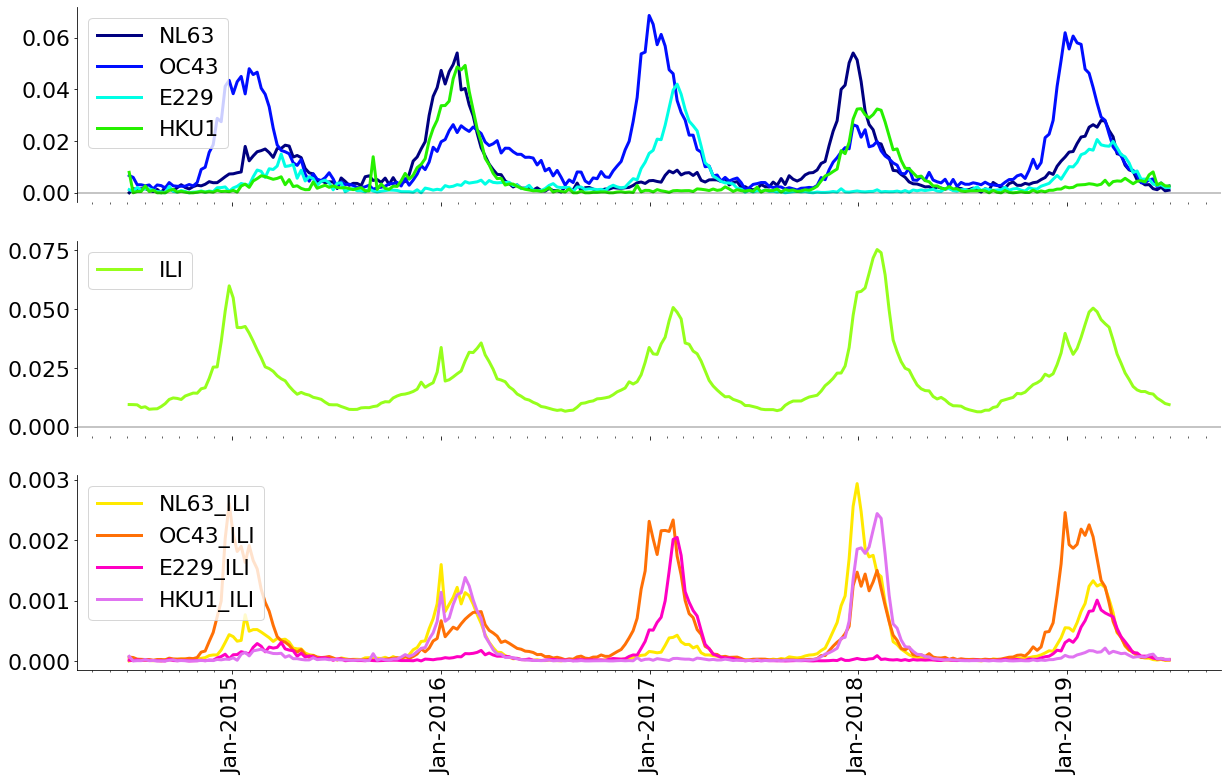

In [3]:
import pylab

NUM_COLORS = 9
cm         = pylab.get_cmap('gist_ncar')


fig, ax = plt.subplots(3, 1, figsize=(20.5, 12.2), sharex=True)

ax[0].plot(ili_df.WEEKEND, ili_df.NL63,     color=cm(0/NUM_COLORS), lw=3,  label= "NL63")
ax[0].plot(ili_df.WEEKEND, ili_df.OC43,     color=cm(1/NUM_COLORS), lw=3,  label= "OC43"    )
ax[0].plot(ili_df.WEEKEND, ili_df.E229,     color=cm(2/NUM_COLORS), lw=3,  label= "E229"    )
ax[0].plot(ili_df.WEEKEND, ili_df.HKU1,     color=cm(3/NUM_COLORS), lw=3,  label= "HKU1"    )

ax[1].plot(ili_df.WEEKEND, ili_df.ILI,      color=cm(4/NUM_COLORS), lw=3,  label= "ILI"     )
ax[2].plot(ili_df.WEEKEND, ili_df.NL63_ILI, color=cm(5/NUM_COLORS), lw=3,  label= "NL63_ILI")
ax[2].plot(ili_df.WEEKEND, ili_df.OC43_ILI, color=cm(6/NUM_COLORS), lw=3,  label= "OC43_ILI")
ax[2].plot(ili_df.WEEKEND, ili_df.E229_ILI, color=cm(7/NUM_COLORS), lw=3,  label= "E229_ILI")
ax[2].plot(ili_df.WEEKEND, ili_df.HKU1_ILI, color=cm(8/NUM_COLORS), lw=3,  label= "HKU1_ILI")

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[-1].legend(loc="upper left")
format_axis(ax[0], week=False); ax[0].spines['bottom'].set_visible(False); ax[0].axhline(y=0, color="k", alpha=0.3)
format_axis(ax[1], week=False); ax[1].spines['bottom'].set_visible(False); ax[1].axhline(y=0, color="k", alpha=0.3)
format_axis(ax[2], week=False)

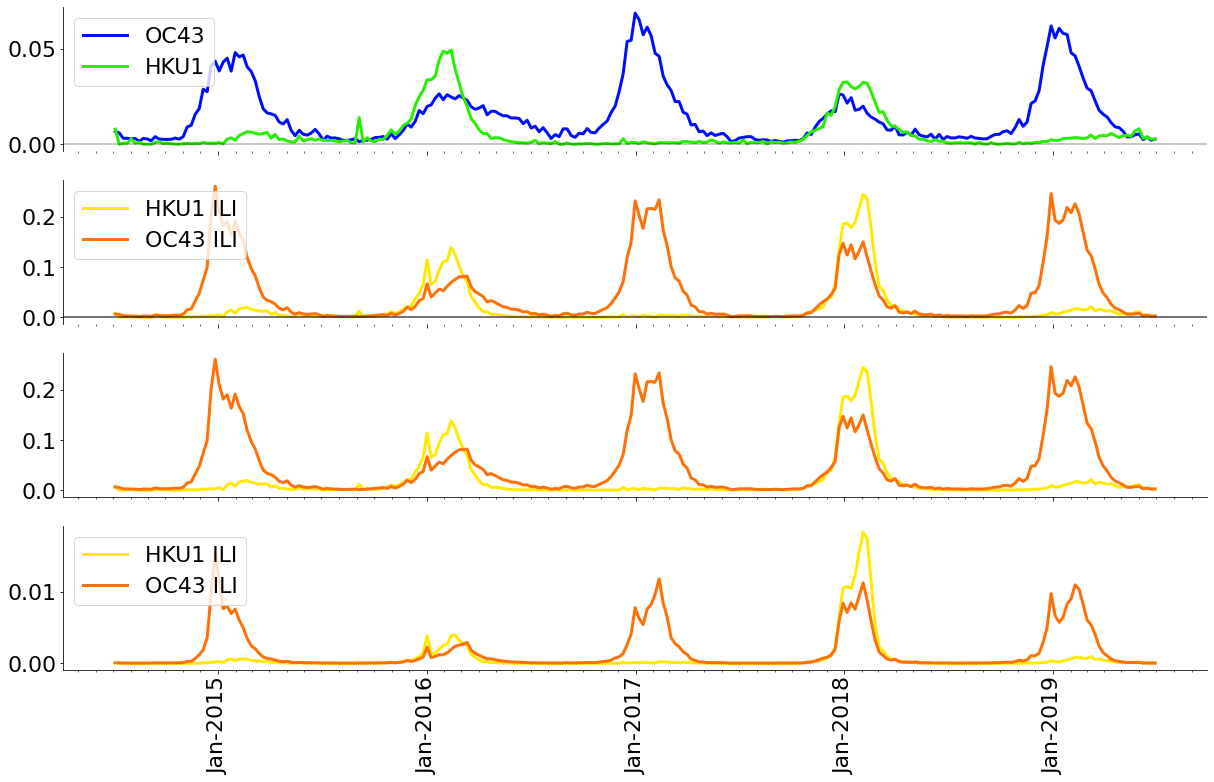

In [34]:
import pylab

NUM_COLORS = 9
cm         = pylab.get_cmap('gist_ncar')


fig, ax = plt.subplots(4, 1, figsize=(20.5, 12.2), sharex=True)

ax[0].plot(ili_df.WEEKEND, ili_df.OC43,     color=cm(1/NUM_COLORS), lw=3,  label= "OC43"    )
ax[0].plot(ili_df.WEEKEND, ili_df.HKU1,     color=cm(3/NUM_COLORS), lw=3,  label= "HKU1"    )

#ax[1].plot(ili_df.WEEKEND, ili_df.ILI,      color=cm(4/NUM_COLORS), lw=3,  label= "ILI"     )
ax[1].plot(ili_df.WEEKEND, ili_df.HKU1_ILI*100, color=cm(5/NUM_COLORS), lw=3,  label= "HKU1 ILI"     )
ax[1].plot(ili_df.WEEKEND, ili_df.OC43_ILI*100, color=cm(6/NUM_COLORS), lw=3,  label= "OC43 ILI"     )

#ax[1].plot(ili_df.WEEKEND, ili_df.ILI,      color=cm(4/NUM_COLORS), lw=3,  label= "ILI"     )
ax[2].plot(ili_df.WEEKEND, (ili_df.HKU1*100)*(ili_df.ILI*100)/100, color=cm(5/NUM_COLORS), lw=3,  label= "HKU1 ILI"     )
ax[2].plot(ili_df.WEEKEND, (ili_df.OC43*100)*(ili_df.ILI*100)/100, color=cm(6/NUM_COLORS), lw=3,  label= "OC43 ILI"     )

ax[3].plot(ili_df.WEEKEND, (ili_df.HKU1_ILI*100)*(ili_df.ILI*100)/100, color=cm(5/NUM_COLORS), lw=3,  label= "HKU1 ILI"     )
ax[3].plot(ili_df.WEEKEND, (ili_df.OC43_ILI*100)*(ili_df.ILI*100)/100, color=cm(6/NUM_COLORS), lw=3,  label= "OC43 ILI"     )

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[-1].legend(loc="upper left")
format_axis(ax[0], week=False); ax[0].spines['bottom'].set_visible(False); ax[0].axhline(y=0, color="k", alpha=0.3)
format_axis(ax[1], week=False); ax[1].spines['bottom'].set_visible(False); ax[1].axhline(y=0, color="k", alpha=0.3)
format_axis(ax[2], week=False); ax[1].spines['bottom'].set_visible(False); ax[1].axhline(y=0, color="k", alpha=0.3)
format_axis(ax[3], week=False); ax[1].spines['bottom'].set_visible(False); ax[1].axhline(y=0, color="k", alpha=0.3)


In [4]:
def beta_value(t, amplitude=1, baseline=1.5, phi=-4, gamma=1):

    return gamma*(amplitude/2*np.cos(2*np.pi*(t-phi)/52) + (amplitude/2 + baseline))

def import_value(t, kappa, import_time, import_length):
    tstart = import_time
    tend   = import_time + import_length

    return (( dates > tstart) &  (dates <= (tstart+tend)) +1 -1) * kappa

def binomial_transition(var, rate, dt=1):
    kb = np.maximum(1.0 - np.exp(-rate * dt), 0)
    num_ind   = np.random.binomial(list(var), kb )
    return num_ind

def deterministic_transition(var, rate, dt=1):
    return var * rate * dt

def checkbound_variables(var_array, upp=1, downn=0):
    var_array = np.array(var_array)
    return np.clip(var_array, downn, upp)

""" Two strain SEIRS transmission model

Args:
    t : Time
    S : Suceptibles to both striains [1, num_ensembles]
    x : State space                  [num_variables, num_variables , num_ensembles] x Vars Strain1 , Vars Strain2, Num Ensembles
         S2   | E2   | I2   | R2
       ___________________________
    S1 | S1S2 | S1E2 | S1I2 | S1R2
    E1 | E1S2 | E1E2 | E1I2 | E1R2
    I1 | I1S2 | I1E2 | I1I2 | I1R2
    R1 | R1S2 | R1E2 | R1I2 | R1R2

    params : Parameters
"""
def model(t, x_strains, params, transition=deterministic_transition, dt=1):
    # S:=0, E:=1, I:=2, R:=3

    S1S2 = x_strains[0, 0, :] # Susceptible to both strains
    S1E2 = x_strains[0, 1, :] # Susceptible to Strain1 & Exposed to Strain2 (infected not infectious)
    S1I2 = x_strains[0, 2, :] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)
    S1R2 = x_strains[0, 3, :] # Susceptible to Strain1 & Immunized to Strain2 (immunity is assumed to wane)

    E1S2 = x_strains[1, 0, :] # Exposed to Strain1 & Susceptible to Strain2
    E1E2 = x_strains[1, 1, :] # Exposed to Strain1 & Exposed to Strain2 (infected not infectious)
    E1I2 = x_strains[1, 2, :] # Exposed to Strain1 & Infected to Strain2 (infected and infectious)
    E1R2 = x_strains[1, 3, :] # Exposed to Strain1 & Immunized to Strain2 (immunity is assumed to wane)

    I1S2 = x_strains[2, 0, :] # Infeected with Strain1 & Susceptible to Strain2
    I1E2 = x_strains[2, 1, :] # Infeected with Strain1 & Exposed to Strain2 (infected not infectious)
    I1I2 = x_strains[2, 2, :] # Infeected with Strain1 & Infected to Strain2 (infected and infectious)
    I1R2 = x_strains[2, 3, :] # Infeected with Strain1 & Immunized to Strain2 (immunity is assumed to wane)

    R1S2 = x_strains[3, 0, :] # Immune to Strain1 & Susceptible to Strain2
    R1E2 = x_strains[3, 1, :] # Immune to Strain1 & Exposed to Strain2 (infected not infectious)
    R1I2 = x_strains[3, 2, :] # Immune to Strain1 & Infected to Strain2 (infected and infectious)
    R1R2 = x_strains[3, 3, :] # Immune to Strain1 & Immunized to Strain2 (immunity is assumed to wane)

    I1 = I1S2 + I1E2 + I1I2 + I1R2 # Total people infected with the 1st strain
    I2 = S1I2 + E1I2 + I1I2 + R1I2 # Total people infected with the 2nd strain

    beta   = params["beta"]
    chi12  = params["chi12"]  # Cross immunity, strain 1 against strain 2.
    chi21  = params["chi21"]  # Cross immunity, strain 2 against strain 1.
    nu     = params["nu"]     # Rate of progression to infection, weeks.
    gamma  = params["gamma"]  # Recovery rate.
    sigma1 = params["sigma1"] # Wanning rate of immunity with 1st strain.
    sigma2 = params["sigma2"] # Wanning rate of immunity with 1st strain.
    p1     = params["p1"]
    p2     = params["p2"]
    N      = params["pop"]

    # FOI to completely susceptible populations
    foi1            = beta * I1 / N # Infection probability with 1st strain.
    foi2            = beta * I2 / N # Infection probability with 2nd strain.

    foi_cross_imm_1 = beta * (1-chi21) * I1 / N # Infection probability with 1st strain but already infected with 2nd.
    foi_cross_imm_2 = beta * (1-chi12) * I2 / N # Infection probability with 2nd strain but already infected with 1st.


    # Infection with 1st strain | FOI + pulse FOI
    S1S2toE1S2 = transition(S1S2, dt * foi1 )           + transition(S1S2, p1)
    S1E2toE1E2 = transition(S1E2, dt * foi_cross_imm_1) + transition(S1E2, dt * (1-chi21)*p1)
    S1I2toE1I2 = transition(S1I2, dt * foi_cross_imm_1) + transition(S1I2, dt * (1-chi21)*p1)
    S1R2toE1R2 = transition(S1R2, dt * foi_cross_imm_1) + transition(S1R2, dt * (1-chi21)*p1)

    # Infection with 2nd strain | FOI + pulse FOI
    S1S2toS1E2 = transition(S1S2, dt * foi2 )           + transition(S1S2, p2)
    E1S2toE1E2 = transition(E1S2, dt * foi_cross_imm_2) + transition(E1S2, dt * (1-chi12)*p2)
    I1S2toI1E2 = transition(I1S2, dt * foi_cross_imm_2) + transition(I1S2, dt * (1-chi12)*p2)
    R1S2toR1E2 = transition(R1S2, dt * foi_cross_imm_2) + transition(R1S2, dt * (1-chi12)*p2)

    # exposed 2 infected with 1st strain
    E1S2toI1S2 = transition(E1S2, dt * nu)
    E1E2toI1E2 = transition(E1E2, dt * nu)
    E1I2toI1I2 = transition(E1I2, dt * nu)
    E1R2toI1R2 = transition(E1R2, dt * nu)

    # exposed 2 infected with 2nd strain
    S1E2toS1I2 = transition(S1E2, dt * nu)
    E1E2toE1I2 = transition(E1E2, dt * nu)
    I1E2toI1I2 = transition(I1E2, dt * nu)
    R1E2toR1I2 = transition(R1E2, dt * nu)

    # infected to recovered with 1st strain
    I1S2toR1S2 = transition(I1S2, dt * gamma)
    I1E2toR1E2 = transition(I1E2, dt * gamma)
    I1I2toR1I2 = transition(I1I2, dt * gamma)
    I1R2toR1R2 = transition(I1R2, dt * gamma)

    # infected to recovered with 2nd strain
    S1I2toS1R2 = transition(S1I2, dt * gamma)
    E1I2toE1R2 = transition(E1I2, dt * gamma)
    R1I2toR1R2 = transition(R1I2, dt * gamma)
    I1I2toI1R2 = transition(I1I2, dt * gamma)

    # wanning immunity 1st strain
    R1S2toS1S2 = transition(R1S2, dt * sigma1)
    R1E2toS1E2 = transition(R1E2, dt * sigma1)
    R1I2toS1I2 = transition(R1I2, dt * sigma1)
    R1R2toS1R2 = transition(R1R2, dt * sigma1)

    # wanning immunity 2nd strain
    S1R2toS1S2 = transition(S1R2, dt * sigma2)
    E1R2toE1S2 = transition(E1R2, dt * sigma2)
    R1R2toR1S2 = transition(R1R2, dt * sigma2)
    I1R2toI1S2 = transition(I1R2, dt * sigma2)


    S1S2 = S1S2 - S1S2toE1S2 - S1S2toS1E2 + S1R2toS1S2 + R1S2toS1S2
    S1E2 = S1E2 - S1E2toE1E2 - S1E2toS1I2 + S1S2toS1E2 + R1E2toS1E2
    S1I2 = S1I2 - S1I2toE1I2 - S1I2toS1R2 + S1E2toS1I2 + R1I2toS1I2
    S1R2 = S1R2 - S1R2toE1R2 - S1R2toS1S2 + R1R2toS1R2 + S1I2toS1R2

    E1S2 = E1S2 - E1S2toE1E2 - E1S2toI1S2 + E1R2toE1S2 + S1S2toE1S2
    E1E2 = E1E2 - E1E2toE1I2 - E1E2toI1E2 + E1S2toE1E2 + S1E2toE1E2
    E1I2 = E1I2 - E1I2toE1R2 - E1I2toI1I2 + S1I2toE1I2 + E1E2toE1I2
    E1R2 = E1R2 - E1R2toE1S2 - E1R2toI1R2 + S1R2toE1R2 + E1I2toE1R2

    I1S2 = I1S2 - I1S2toI1E2 - I1S2toR1S2 + I1R2toI1S2 + E1S2toI1S2
    I1E2 = I1E2 - I1E2toI1I2 - I1E2toR1E2 + E1E2toI1E2 + I1S2toI1E2
    I1I2 = I1I2 - I1I2toI1R2 - I1I2toR1I2 + E1I2toI1I2 + I1E2toI1I2
    I1R2 = I1R2 - I1R2toI1S2 - I1R2toR1R2 + E1R2toI1R2 + I1I2toI1R2

    R1S2 = R1S2 - R1S2toR1E2 - R1S2toS1S2 + I1S2toR1S2 + R1R2toR1S2
    R1E2 = R1E2 - R1E2toR1I2 - R1E2toS1E2 + I1E2toR1E2 + R1S2toR1E2
    R1I2 = R1I2 - R1I2toR1R2 - R1I2toS1I2 + I1I2toR1I2 + R1E2toR1I2
    R1R2 = R1R2 - R1R2toR1S2 - R1R2toS1R2 + I1R2toR1R2 + R1I2toR1R2


    return checkbound_variables([[S1S2, S1E2 ,S1I2, S1R2], [E1S2, E1E2, E1I2, E1R2], [I1S2, I1E2, I1I2, I1R2], [R1S2, R1E2, R1I2, R1R2]], upp=N)



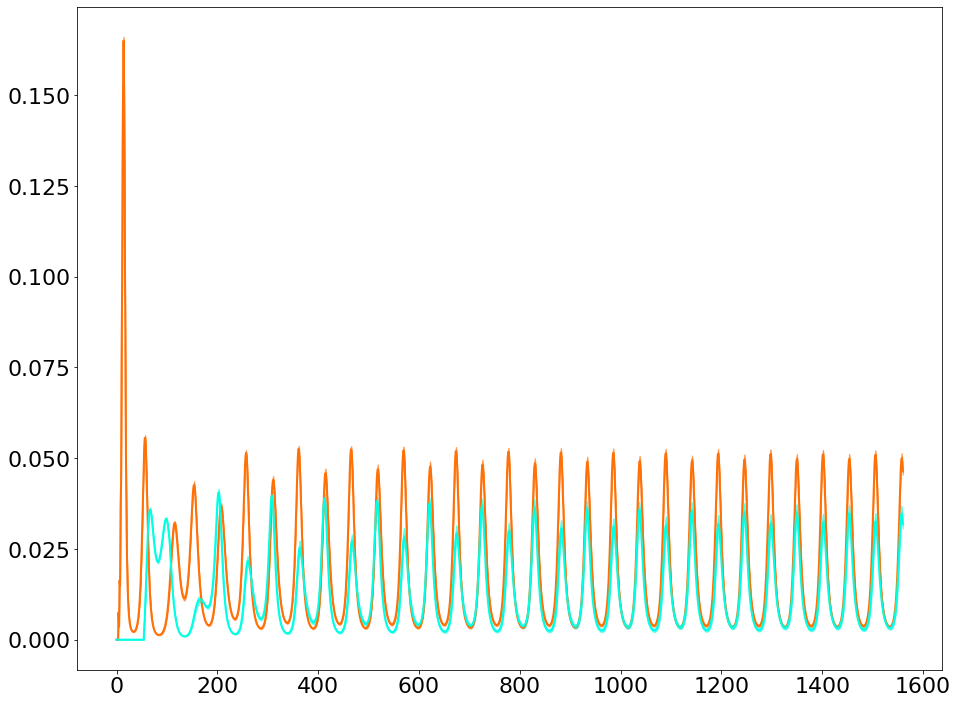

In [87]:
def sim_model(model, times, params, transition=deterministic_transition):

    S0    = np.expand_dims(np.array([1, 0, 0, 0]), -1) * np.ones((4,300)) * params["pop"]
    E0    = np.expand_dims(np.array([0, 0, 0, 0]), -1) * np.ones((4,300))
    I0    = np.expand_dims(np.array([0, 0, 0, 0]), -1) * np.ones((4,300))
    R0    = np.expand_dims(np.array([0, 0, 0, 0]), -1) * np.ones((4,300))
    x0    = np.concatenate([[S0], [E0], [I0], [R0]])


    xall          = np.repeat( np.expand_dims(np.full((x0.shape), np.nan), 0), repeats=len(times), axis=0)
    xall[0,:,:,:] = x0

    betas = beta_value(times, params["amplitude"], params["baseline"], params["phi"], params["gamma"])
    pp1 =  import_value(dates, params["kappa"], params["importtime1"], params["importlength"])
    pp2 =  import_value(dates, params["kappa"], params["importtime2"], params["importlength"])

    for t in times[:-1]:
        params["beta"] = betas[t] #* params["pop"]
        params["p1"]   = pp1[t]   #* params["pop"]
        params["p2"]   = pp2[t]   #* params["pop"]

        xall[t+1,:,:,:]  = model(t,  xall[t,:,:,:], params, dt=1, transition=transition)

    return xall



# THIS IS IN WEEKS
params                 = {}
params["importlength"] = 0.5     # Duration of importation pulse, weeks
params["importtime1"]  = 1      # Time of strain 1 importation, weeks
params["importtime2"]  = 52      # Time of strain 2 importation, weeks
params["amplitude"]    = 0.6     # R0 seasonality amplitude (dev. 1)
params["baseline"]     = 1.4     # R0 seasonality baseline (def. 1.5)
params["kappa"]        = 0.01    # Force of infection pulse size for introductions
params["sigma1"]       = 1/40    # Waning immunity rate, strain 1, weeks (def. 1/40)
params["sigma2"]       = 1/40    # Waning immunity rate, strain 2, weeks (def. 1/40)
params["gamma"]        = 1/(5/7) # Rate of recovery, weeks (def. 1/1)
params["chi12"]        = 0.7     # Cross immunity, strain 1 against strain 2 (def. 0.7)
params["chi21"]        = 0.5     # Cross immunity, strain 2 against strain 1 (def. 0.3)
params["phi"]          = -4      # R0 seasonality phase shift, weeks (def. -4)
params["nu"]           = 1/(5/7) # Rate of progression to infection, weeks (def. 1/1)
params["pop"]          = 1e6




# parms=c(
# 	sigma1.val = 1/40, # Waning immunity rate, strain 1, weeks (def. 1/40)
# 	sigma2.val = 1/38, # Waning immunity rate, strain 2, weeks (def. 1/40)
# 	nu.val = 1/(5/7),      # Rate of progression to infection, weeks (def. 1/1)
# 	gamma.val = 1/(4.9/7),   # Rate of recovery, weeks (def. 1/1)
# 	chi12.val = 0.74,   # Cross immunity, strain 1 against strain 2 (def. 0.7)
# 	chi21.val = 0.5,   # Cross immunity, strain 2 against strain 1 (def. 0.3)
# 	amplitude = 0.66,     # R0 seasonality amplitude (dev. 1)
# 	baseline = 1.4,    # R0 seasonality baseline (def. 1.5)
# 	phi.val = -3.8,      # R0 seasonality phase shift, weeks (def. -4)
# 	kappa.val = 0.01,  # Force of infection pulse size for introductions  
# 	importtime1 = 0,  # Time of strain 1 importation, weeks
# 	importtime2 = 52,   # Time of strain 2 importation, weeks
# 	importlength = 0.5 # Duration of importation pulse, weeks
# 	)
#times <- seq(0,52*30,1)

params                 = {}
params["importlength"] = 0.5     # Duration of importation pulse, weeks
params["importtime1"]  = 1      # Time of strain 1 importation, weeks
params["importtime2"]  = 52      # Time of strain 2 importation, weeks
params["amplitude"]    = 0.66    # R0 seasonality amplitude (dev. 1)
params["baseline"]     = 1.4     # R0 seasonality baseline (def. 1.5)
params["kappa"]        = 0.01    # Force of infection pulse size for introductions
params["sigma1"]       = 1/40    # Waning immunity rate, strain 1, weeks (def. 1/40)
params["sigma2"]       = 1/38    # Waning immunity rate, strain 2, weeks (def. 1/40)
params["gamma"]        = 1/(5/7) # Rate of recovery, weeks (def. 1/1)
params["chi12"]        = 0.74    # Cross immunity, strain 1 against strain 2 (def. 0.7)
params["chi21"]        = 0.5     # Cross immunity, strain 2 against strain 1 (def. 0.3)
params["phi"]          = -3.8      # R0 seasonality phase shift, weeks (def. -4)
params["nu"]           = 1/(5/7) # Rate of progression to infection, weeks (def. 1/1)
params["pop"]          = 1e6





num_years = 30
num_weeks = 52*num_years + 1
dates     = np.arange(0, num_weeks, 1) # Simulation [weeks]

x_sim = sim_model(model, dates, params, transition=binomial_transition)
I1S2 = x_sim[:, 2, 0, :] # Infeected with Strain1 & Susceptible to Strain2
I1E2 = x_sim[:, 2, 1, :] # Infeected with Strain1 & Exposed to Strain2 (infected not infectious)
I1I2 = x_sim[:, 2, 2, :] # Infeected with Strain1 & Infected to Strain2 (infected and infectious)
I1R2 = x_sim[:, 2, 3, :] # Infeected with Strain1 & Immunized to Strain2 (immunity is assumed to wane)

S1I2 = x_sim[:, 0, 2, :] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)
E1I2 = x_sim[:, 1, 2, :] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)
I1I2 = x_sim[:, 2, 2, :] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)
R1I2 = x_sim[:, 3, 2, :] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)


I1 = I1S2 + I1E2 + I1I2 + I1R2 # Total people infected with the 1st strain
I2 = S1I2 + E1I2 + I1I2 + R1I2 # Total people infected with the 2nd strain

i1_df = create_df_response(I1.T / params["pop"], time=len(dates), dates=dates)
i2_df = create_df_response(I2.T / params["pop"], time=len(dates), dates=dates)

scale_factor = 1

fig, ax = plt.subplots(1, 1, figsize=(15.5, 12.2), sharex=True)

ax.plot(i1_df.index.values, i1_df["mean"] * scale_factor, color=cm(6/NUM_COLORS), alpha=1, lw=2, label="Model")
ax.fill_between(i1_df.index.values, i1_df["low_50"] * scale_factor, i1_df["high_50"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.3, lw=1)
ax.fill_between(i1_df.index.values, i1_df["low_95"] * scale_factor, i1_df["high_95"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.5, lw=1)

ax.plot(i2_df.index.values, i2_df["mean"] * scale_factor, color=cm(2/NUM_COLORS), alpha=1, lw=2, label="Model")
ax.fill_between(i2_df.index.values, i2_df["low_50"] * scale_factor, i2_df["high_50"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.3, lw=1)
ax.fill_between(i2_df.index.values, i2_df["low_95"] * scale_factor, i2_df["high_95"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.5, lw=1)




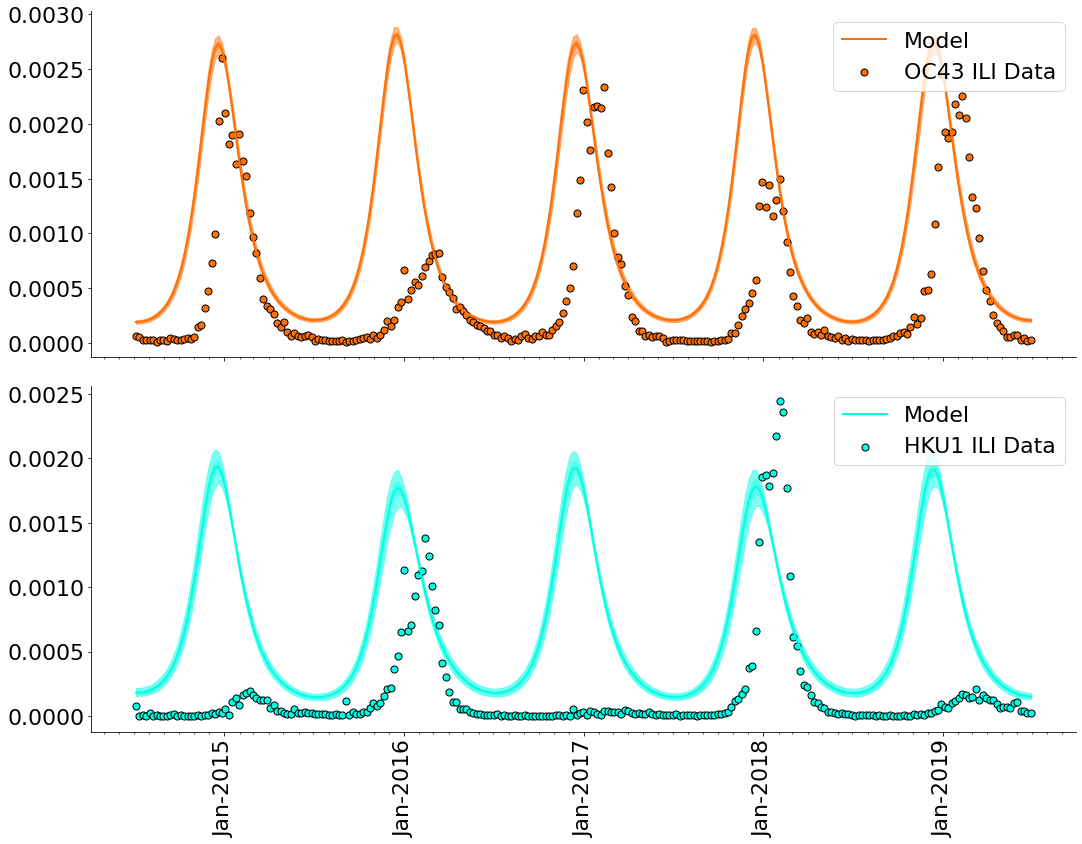

In [133]:
week_start = 23.5
week_end = week_start+5

weeks_use = list(np.arange(52*week_start, 52*week_end+1, 1))

i1_plt_df = i1_df.reset_index(); i1_plt_df = i1_plt_df[i1_plt_df.date.isin(weeks_use)]
i2_plt_df = i2_df.reset_index(); i2_plt_df = i2_plt_df[i2_plt_df.date.isin(weeks_use)]

i1_plt_df["WEEKEND"] = ili_df["WEEKEND"].values
i2_plt_df["WEEKEND"] = ili_df["WEEKEND"].values


fig, ax = plt.subplots(2, 1, figsize=(15.5, 12.2), sharex=True)

scale_factor = 0.055

ax[0].plot(i1_plt_df["WEEKEND"], i1_plt_df["mean"] * scale_factor, color=cm(6/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[0].fill_between(i1_plt_df["WEEKEND"], i1_plt_df["low_50"] * scale_factor, i1_plt_df["high_50"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.3, lw=1)
ax[0].fill_between(i1_plt_df["WEEKEND"], i1_plt_df["low_95"] * scale_factor, i1_plt_df["high_95"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.5, lw=1)

ax[0].scatter(ili_df.WEEKEND, ili_df.OC43_ILI , color=cm(6/NUM_COLORS), edgecolor="k", s=50, label="OC43 ILI Data")

ax[1].plot(i2_plt_df["WEEKEND"], i2_plt_df["mean"] * scale_factor, color=cm(2/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[1].fill_between(i2_plt_df["WEEKEND"], i2_plt_df["low_50"] * scale_factor, i2_plt_df["high_50"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.3, lw=1)
ax[1].fill_between(i2_plt_df["WEEKEND"], i2_plt_df["low_95"] * scale_factor, i2_plt_df["high_95"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.5, lw=1)

ax[1].scatter(ili_df.WEEKEND, ili_df.HKU1_ILI , color=cm(2/NUM_COLORS), edgecolor="k", s=50, label="HKU1 ILI Data")

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

format_axis(ax[0])
format_axis(ax[1])

plt.tight_layout()


array([1.43417911, 1.45396485, 1.47777581, 1.50526477, 1.53603087,
       1.56962547, 1.6055587 , 1.64330657, 1.68231861, 1.72202596,
       1.76184959, 1.80120878, 1.83952959, 1.87625321, 1.91084413,
       1.94279793, 1.97164866, 1.99697561, 2.01840945, 2.03563763,
       2.04840893, 2.05653711, 2.05990364, 2.05845944, 2.05222556,
       2.0412929 , 2.02582089, 2.00603515, 1.98222419, 1.95473523,
       1.92396913, 1.89037453, 1.8544413 , 1.81669343, 1.77768139,
       1.73797404, 1.69815041, 1.65879122, 1.62047041, 1.58374679,
       1.54915587, 1.51720207, 1.48835134, 1.46302439, 1.44159055,
       1.42436237, 1.41159107, 1.40346289, 1.40009636, 1.40154056,
       1.40777444, 1.4187071 , 1.43417911, 1.45396485, 1.47777581,
       1.50526477, 1.53603087, 1.56962547, 1.6055587 , 1.64330657,
       1.68231861, 1.72202596, 1.76184959, 1.80120878, 1.83952959,
       1.87625321, 1.91084413, 1.94279793, 1.97164866, 1.99697561,
       2.01840945, 2.03563763, 2.04840893, 2.05653711, 2.05990

In [161]:
time = np.array([int(w) for w in weeks_use])


S1S2 = x_sim[time, 0, 0, :]/ params["pop"] # Susceptible to both strains
S1E2 = x_sim[time, 0, 1, :]/ params["pop"] # Susceptible to Strain1 & Exposed to Strain2 (infected not infectious)
S1I2 = x_sim[time, 0, 2, :]/ params["pop"] # Susceptible to Strain1 & Infected to Strain2 (infected and infectious)
S1R2 = x_sim[time, 0, 3, :]/ params["pop"] # Susceptible to Strain1 & Immunized to Strain2 (immunity is assumed to wane)

E1S2 = x_sim[time, 1, 0, :]/ params["pop"] # Exposed to Strain1 & Susceptible to Strain2
I1S2 = x_sim[time, 2, 0, :]/ params["pop"] # Infeected with Strain1 & Susceptible to Strain2
R1S2 = x_sim[time, 3, 0, :]/ params["pop"] # Immune to Strain1 & Susceptible to Strain2

s1 = S1S2 + S1E2 + S1I2 + S1R2
s2 = S1S2 + E1S2 + I1S2 + R1S2


re2 = (S1S2 + (1-params["chi21"]) * (S1E2 + S1I2 + S1R2)) * np.expand_dims(beta_value(time, params["amplitude"], params["baseline"], params["phi"]), -1)
re1 = (S1S2 + (1-params["chi12"]) * (E1S2 + I1S2 + R1S2)) * np.expand_dims(beta_value(time, params["amplitude"], params["baseline"], params["phi"]), -1)

re1_df = create_df_response(re1.T, time=len(dates), dates=ili_df["WEEKEND"].values)
re2_df = create_df_response(re2.T, time=len(dates), dates=ili_df["WEEKEND"].values)

s1_df = create_df_response(s1.T, time=len(dates), dates=ili_df["WEEKEND"].values)
s2_df = create_df_response(s2.T, time=len(dates), dates=ili_df["WEEKEND"].values)



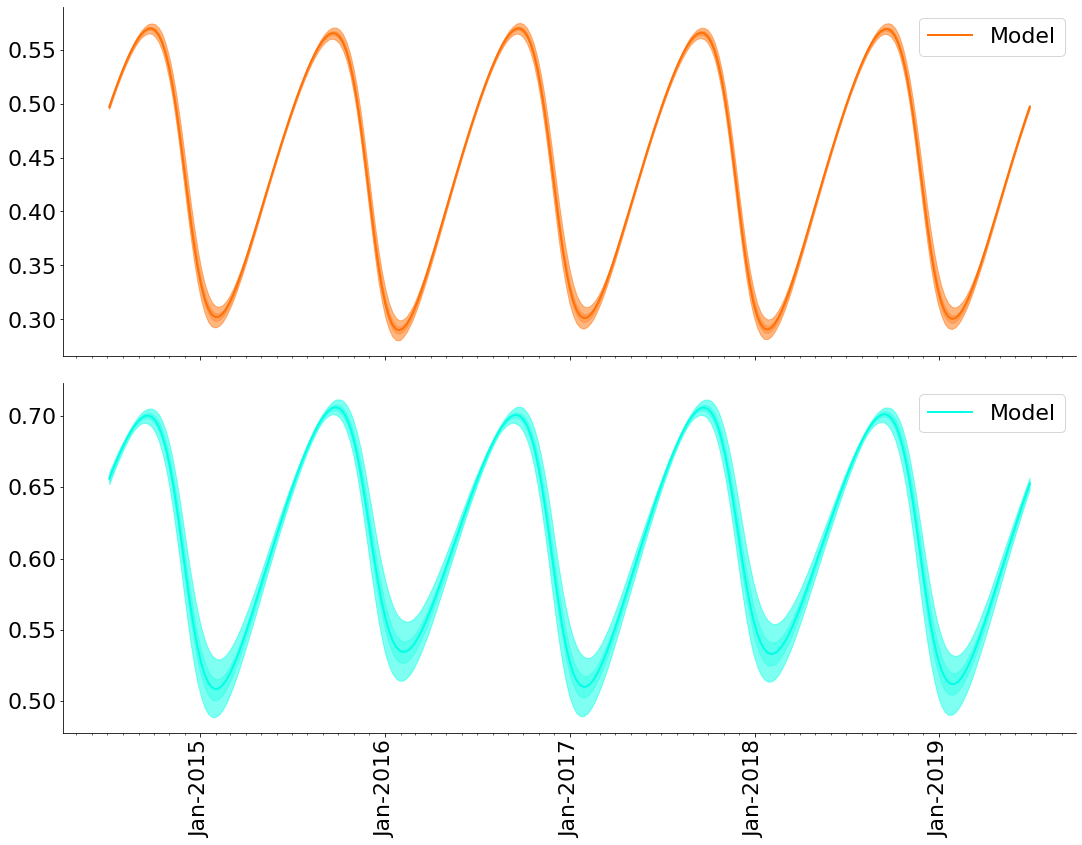

In [165]:
scale_factor = 1 
fig, ax = plt.subplots(2, 1, figsize=(15.5, 12.2), sharex=True)

ax[0].plot(s1_df.index.values, s1_df["mean"] * scale_factor, color=cm(6/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[0].fill_between(s1_df.index.values, s1_df["low_50"] * scale_factor, s1_df["high_50"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.3, lw=1)
ax[0].fill_between(s1_df.index.values, s1_df["low_95"] * scale_factor, s1_df["high_95"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.5, lw=1)

ax[1].plot(s2_df.index.values, s2_df["mean"] * scale_factor, color=cm(2/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[1].fill_between(s2_df.index.values, s2_df["low_50"] * scale_factor, s2_df["high_50"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.3, lw=1)
ax[1].fill_between(s2_df.index.values, s2_df["low_95"] * scale_factor, s2_df["high_95"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.5, lw=1)

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

format_axis(ax[0])
format_axis(ax[1])

plt.tight_layout()


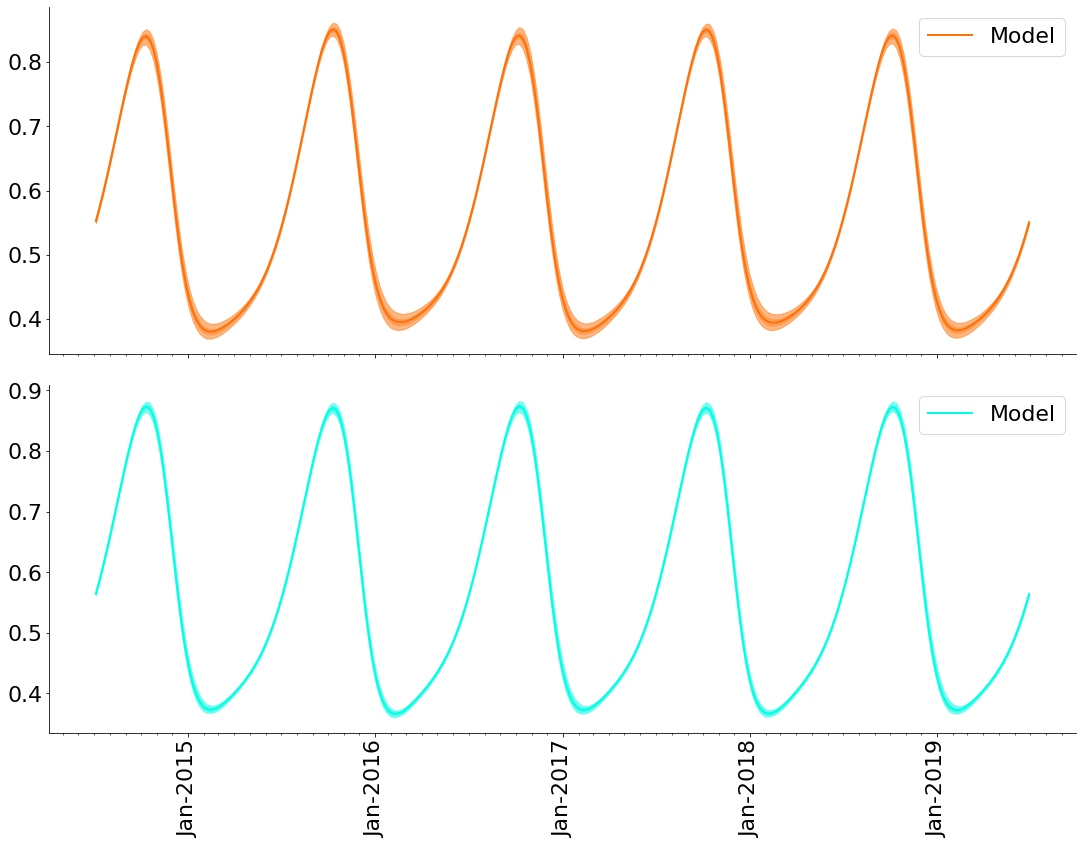

In [167]:
scale_factor = 1

fig, ax = plt.subplots(2, 1, figsize=(15.5, 12.2), sharex=True)

ax[0].plot(re1_df.index.values, re1_df["mean"] * scale_factor, color=cm(6/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[0].fill_between(re1_df.index.values, re1_df["low_50"] * scale_factor, re1_df["high_50"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.3, lw=1)
ax[0].fill_between(re1_df.index.values, re1_df["low_95"] * scale_factor, re1_df["high_95"] * scale_factor, color=cm(6/NUM_COLORS), alpha=0.5, lw=1)


ax[1].plot(re2_df.index.values, re2_df["mean"] * scale_factor, color=cm(2/NUM_COLORS), alpha=1, lw=2, label="Model")
ax[1].fill_between(re2_df.index.values, re2_df["low_50"] * scale_factor, re2_df["high_50"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.3, lw=1)
ax[1].fill_between(re2_df.index.values, re2_df["low_95"] * scale_factor, re2_df["high_95"] * scale_factor, color=cm(2/NUM_COLORS), alpha=0.5, lw=1)

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

format_axis(ax[0])
format_axis(ax[1])

plt.tight_layout()
